# Download Labeled Dataset

In [ ]:
!curl -L "https://universe.roboflow.com/ds/o1aSHwd4NW?key=Np396Su7uo" 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100   904  100   904    0     0    487      0  0:00:01  0:00:01 --:--:--   489

  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0  126M    0 10237    0     0   3011      0 12:16:07  0:00:03 12:16:04  8248
  0  126M    0 51847    0     0  12967      0  2:50:55  0:00:03  2:50:52 28162
  0  126M    0  186k    0     0  38715      0  0:57:15  0:00:04  0:57:11 68729
  0  126M    0  425k    0     0  73387      0  0:30:12  0:00:05  0:30:07  112k
  0  126M    0 1102k    0     0   157k      0  0:13:43  0:00:06  0:13:37  227k
  1  126M    1 1950k    0     0   245k      0  0:08:48  0:00:07  0:08:41  427k
  2  126M    2 2958k    0     0   331k      0  0:0

# Plot a sample from dataset

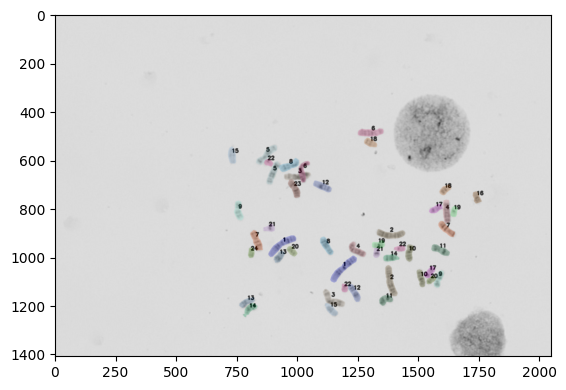

Output saved to Dataset Samples\74_2_933_279_0-787_jpg.rf.11484c5cbe0cc6af3636155092638e27.jpg


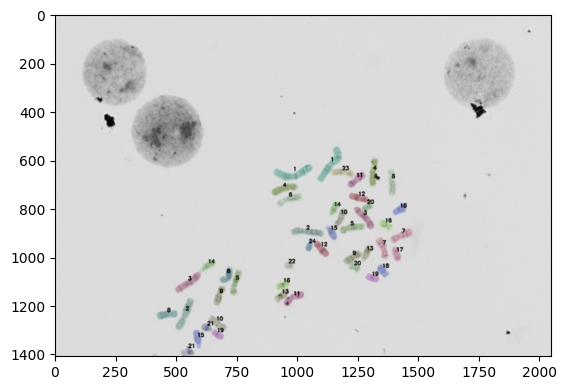

Output saved to Dataset Samples\86_1_541_312_0-775_jpg.rf.cd9f6fa7dbee501a09e6264e55100717.jpg


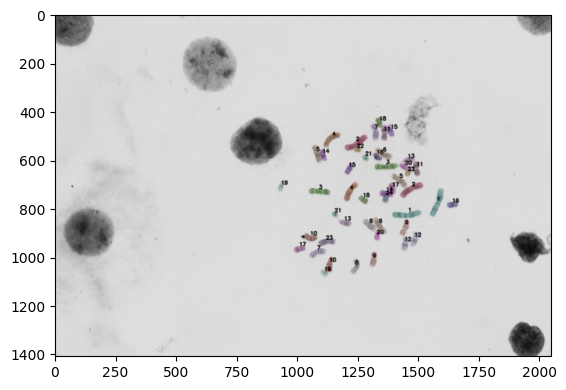

Output saved to Dataset Samples\173_2_884_444_0-886_jpg.rf.6699bdb03d6d276c9afdd94ce4ddc76d.jpg


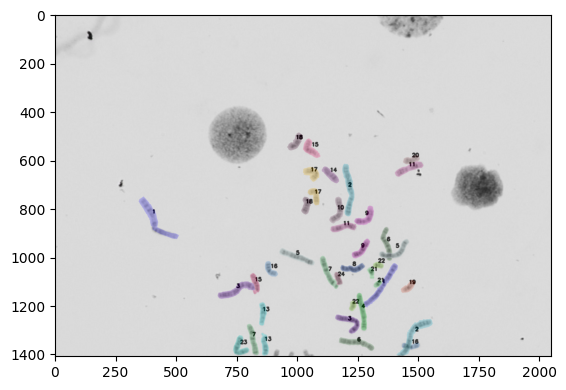

Output saved to Dataset Samples\154_4_933_411_0-519_jpg.rf.ac3126dd2caf7ae33a56bfd1a955a2b9.jpg


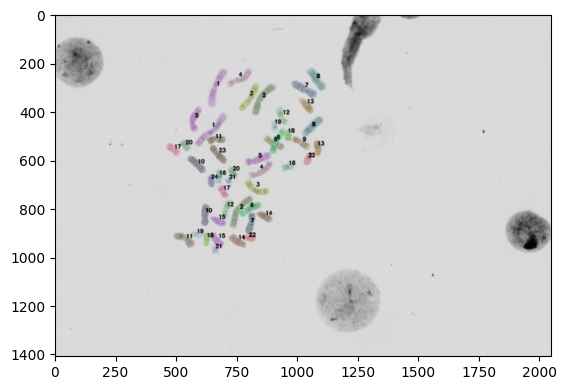

Output saved to Dataset Samples\196_2_1031_477_0-823_jpg.rf.d21f1a5b9641071fd48ec0473057ed6c.jpg


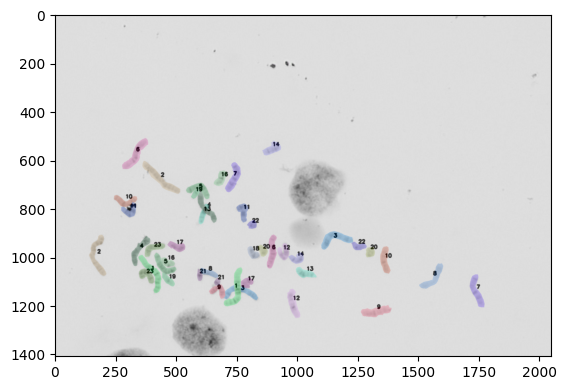

Output saved to Dataset Samples\87_1_590_312_0-630_jpg.rf.df28aaab4faf1984e9b65503e7e8a985.jpg


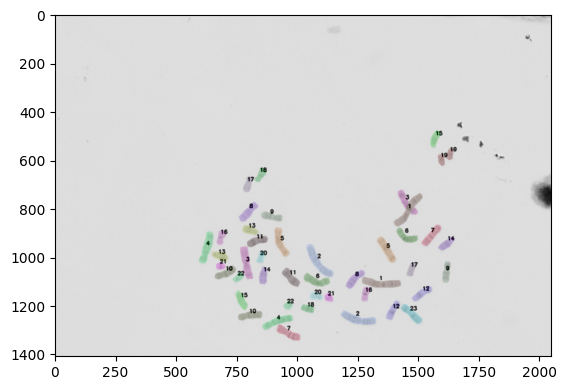

Output saved to Dataset Samples\13_1_884_180_0-728_jpg.rf.9cb811278b9e60ac962967e54d7e7aa7.jpg


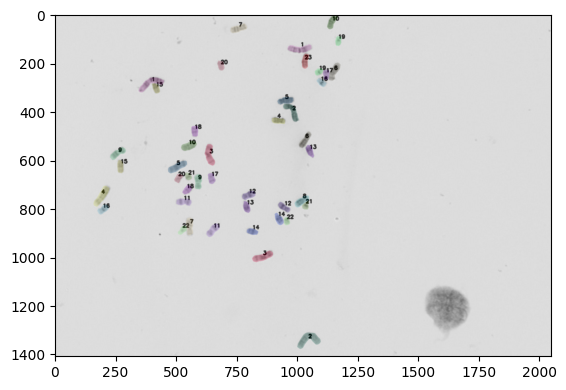

Output saved to Dataset Samples\81_2_296_312_0-470_jpg.rf.b9e10deb5ce56628cabe7ad12c62f177.jpg


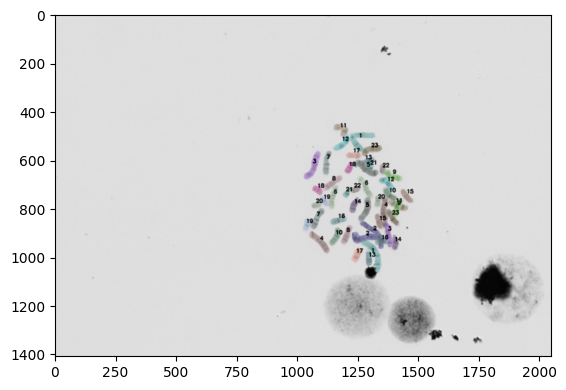

Output saved to Dataset Samples\69_4_688_279_0-781_jpg.rf.ee7dc114c4be00b15e1315350d7f9868.jpg


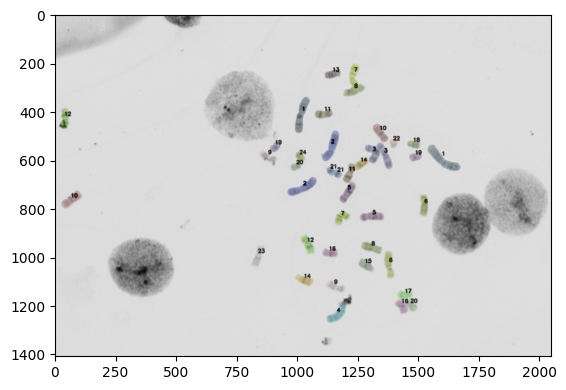

Output saved to Dataset Samples\62_4_345_279_0-910_jpg.rf.2faeb147c81df2a27008823c441f104d.jpg


In [15]:
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
def draw_segmentation_masks_with_labels(image_path, annotation_path, output_path, class_names):
    """
    Draws segmentation masks with unique colors and transparency for each class
    and writes class names above the masks.

    Args:
        image_path (str): Path to the input image.
        annotation_path (str): Path to the annotation file in YOLO instance segmentation format.
        output_path (str): Path to save the output image.
        class_names (list): List of class names corresponding to class IDs.
    """
    # Load the image
    image = cv2.imread(image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

    overlay = image.copy()  
    height, width, _ = image.shape

    # Generate unique colors for each class
    num_classes = len(class_names)
    colors = [tuple(np.random.randint(0, 255, 3).tolist()) for _ in range(num_classes)]

    # Alpha (transparency level, 0.0 to 1.0)
    alpha = 0.25

    # Load annotations
    with open(annotation_path, 'r') as file:
        annotations = file.readlines()

    for annotation in annotations:
        # Parse the line
        parts = annotation.strip().split()
        class_id = int(parts[0])  
        polygon = list(map(float, parts[1:])) 
        # Convert polygon points from normalized to absolute pixel coordinates
        points = np.array(
            [[int(float(x) * width), int(float(y) * height)] for x, y in zip(polygon[0::2], polygon[1::2])],
            dtype=np.int32
        )

        # Draw the mask (filled polygon) on the overlay
        color = colors[class_id]
        cv2.fillPoly(overlay, [points], color=color)

        # Write the class name above the mask
        centroid_x = int(np.mean(points[:, 0]))
        centroid_y = int(np.mean(points[:, 1]))
        label = class_names[class_id]
        cv2.putText(
            image,
            label,
            (centroid_x, centroid_y - 10),  # Slightly above the centroid
            cv2.FONT_HERSHEY_SIMPLEX,
            0.7,  # Font scale
            (0, 0, 0), 
            3,  # Thickness
            cv2.LINE_AA
        )

    # Blend the overlay with the original image
    cv2.addWeighted(image,  1 - alpha,overlay,alpha, 0, image)
    # Save the output image
    plt.imshow(image)
    plt.show()
    cv2.imwrite(output_path, image)
    print(f"Output saved to {output_path}")


class_names = ['1', '10', '11', '12', '13', '14', 
               '15', '16', '17', '18', '19', '2', 
               '20', '21', '22', '23', '24', '3', 
               '4', '5', '6', '7', '8', '9']

#Get a sample from dataset
data_path='train/images'
annot_path='train/labels'
output_path='Dataset Samples'
data_set_files=os.listdir(data_path)
random_indecies=[random.randint(0,len(data_set_files)) for _ in range(10)]
dataset_sample=[data_set_files[i] for i in random_indecies]

#Plot masks on the sample
for img in dataset_sample:
    draw_segmentation_masks_with_labels(
        image_path=os.path.join(data_path,img),
        annotation_path=os.path.join(annot_path,img[:-3]+'txt'),
        output_path=os.path.join(output_path,img),
        class_names=class_names
    )


# Count Number of labeled objects in each class

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14624\3563139100.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('plasma', len(class_names))


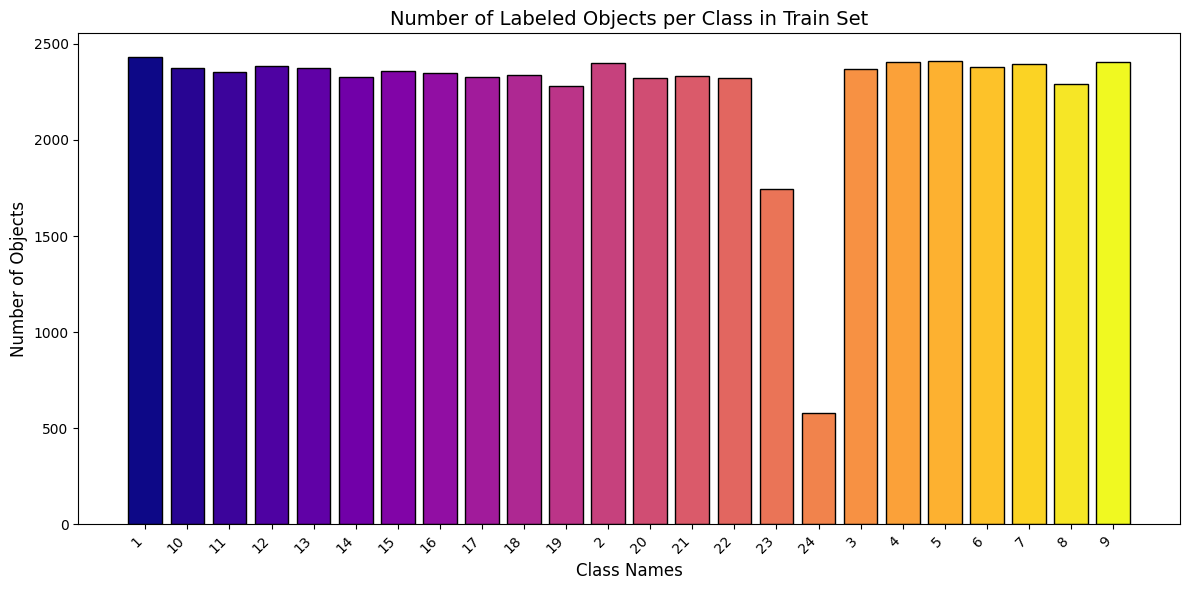

Train---------
1: 2433
10: 2376
11: 2354
12: 2384
13: 2373
14: 2328
15: 2357
16: 2348
17: 2327
18: 2336
19: 2278
2: 2398
20: 2324
21: 2332
22: 2320
23: 1743
24: 580
3: 2371
4: 2406
5: 2409
6: 2377
7: 2394
8: 2292
9: 2408
--------------


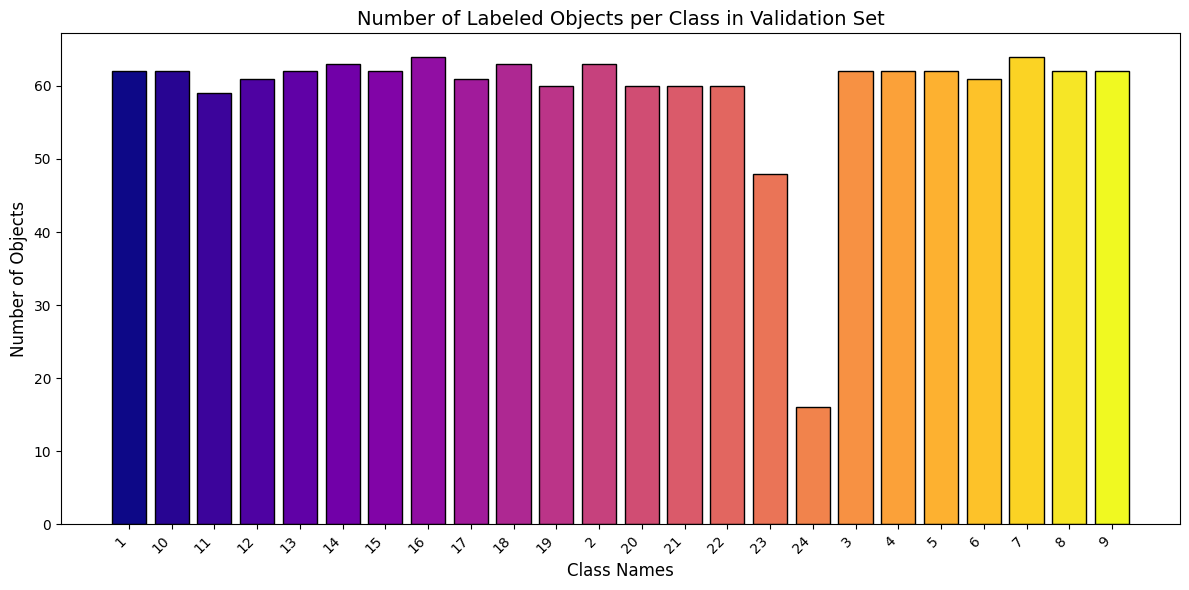

Validation---------
1: 62
10: 62
11: 59
12: 61
13: 62
14: 63
15: 62
16: 64
17: 61
18: 63
19: 60
2: 63
20: 60
21: 60
22: 60
23: 48
24: 16
3: 62
4: 62
5: 62
6: 61
7: 64
8: 62
9: 62
--------------


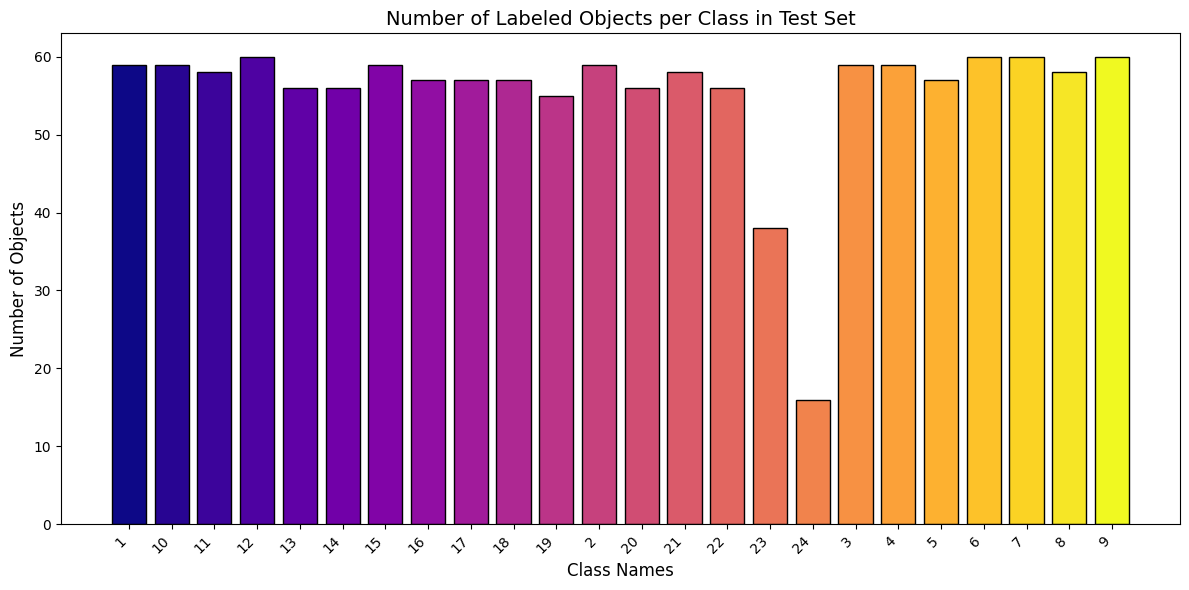

Test---------
1: 59
10: 59
11: 58
12: 60
13: 56
14: 56
15: 59
16: 57
17: 57
18: 57
19: 55
2: 59
20: 56
21: 58
22: 56
23: 38
24: 16
3: 59
4: 59
5: 57
6: 60
7: 60
8: 58
9: 60
--------------


In [23]:
from collections import defaultdict

def count_and_plot_classes_from_folder(dataset_folder, class_names,title):
    """
    Counts the number of labeled objects in each class from a dataset folder
    and plots a bar graph of the counts.

    Args:
        dataset_folder (str): Path to the dataset folder containing annotation files.
        class_names (list): List of class names corresponding to class IDs.
        title (str): Dataset split (train/valid ...)

    """
    # Initialize counts for each class
    class_counts = defaultdict(int)

    # Iterate through all annotation files in the dataset folder
    for file_name in os.listdir(dataset_folder):
        if file_name.endswith(".txt"):  
            annotation_path = os.path.join(dataset_folder, file_name)
            with open(annotation_path, 'r') as file:
                annotations = file.readlines()
                for annotation in annotations:
                    class_id = int(annotation.strip().split()[0])  
                    class_counts[class_names[class_id]] += 1

    # Ensure all classes are represented in the dictionary (even with zero count)
    for class_name in class_names:
        if class_name not in class_counts:
            class_counts[class_name] = 0

    # Sort the counts for consistent plotting
    class_counts = dict(sorted(class_counts.items()))

    # Plotting
    colors = plt.cm.get_cmap('plasma', len(class_names)) 
    color_list = [colors(i) for i in range(len(class_names))]
    plt.figure(figsize=(12, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color=color_list, edgecolor='black')
    plt.xlabel('Class Names', fontsize=12)
    plt.ylabel('Number of Objects', fontsize=12)
    plt.title(f'Number of Labeled Objects per Class in {title} Set', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()  

    plt.show()

    return class_counts

dataset_folder_train = "train/labels"
dataset_folder_valid = "valid/labels"
dataset_folder_test = "test/labels"


class_counts = count_and_plot_classes_from_folder(dataset_folder_train, class_names,'Train')
print('Train---------')
for i in class_counts.items():
    print(i[0]+':',i[1])
print('--------------')
class_counts = count_and_plot_classes_from_folder(dataset_folder_valid, class_names,'Validation')
print('Validation---------')
for i in class_counts.items():
    print(i[0]+':',i[1])
print('--------------')
class_counts = count_and_plot_classes_from_folder(dataset_folder_test, class_names,'Test')
print('Test---------')
for i in class_counts.items():
    print(i[0]+':',i[1])
print('--------------')


